# Regression algorithms in python
This notebook is going to be an in-depth exploration of the world of Regression algorithms. We will take a look at different regression algorithms, the theory and intuition behind them and how to implement them using python. This tutorial is a must for beginners and will be based on scikit-learn library of python. We will use breast cancer data for this tutorial.

In [1]:
# Importing initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Pre-requisites for this tutorial
1. Good command over python
2. Basic data analysis
3. Beginners' level knowledge of numpy, pandas and matplotlib
4. Familiarity with seaborn(not that important)

In [2]:
# Importing data
data = pd.read_csv('data.csv')
del data['Unnamed: 32']

# About Breast Cancer Wisconsin (Diagnostic) Data Set

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Here, we will not predict whether cancer is benign or malignant. That will be saved for a classification tutorial. For now, we will predict different columns values like predicting radius_mean from concavity_mean.

# What is regression?
A technique for determining the statistical relationship between two or more variables where a change in a dependent variable is associated with, and depends on, a change in one or more independent variables.


Disclaimer: This tutorial won't involve topics like feature selection, model selection orfeature engineering because they are just a little bit advanced for beginners who are here to learn about regression.

First, let's see correlation in the dataset to determine the columns to be selected for regression

# What is correlation?
Correlation is a bivariate analysis that measures the strength of association between two variables and the direction of the relationship.  In terms of the strength of relationship, the value of the correlation coefficient varies between +1 and -1.  A value of ± 1 indicates a perfect degree of association between the two variables.  As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker.  The direction of the relationship is indicated by the sign of the coefficient; a + sign indicates a positive relationship and a – sign indicates a negative relationship. Usually, in statistics, we measure four types of correlations: Pearson correlation, Kendall rank correlation, Spearman correlation, and the Point-Biserial correlation.

In [4]:
# Let's take a look at the columns applicable for correlation
column_list = ['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']
column_list

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [5]:
# Creating a new dataframe for showing correlation of different columns
corr_1 = []
corr_2 = []
correlation = []
for i in column_list:
    for j in column_list:
        corr_1.append(i)
        corr_2.append(j)
        correlation.append(data[i].corr(data[j]))
corr_data = pd.DataFrame(
    {'Corr_1': corr_1,
     'Corr_2': corr_2,
     'Correlation': correlation
    })
corr_data.head()

,Corr_1,Corr_2,Correlation
0,radius_mean,radius_mean,1.000000
1,radius_mean,texture_mean,0.323782
2,radius_mean,perimeter_mean,0.997855
3,radius_mean,area_mean,0.987357
4,radius_mean,smoothness_mean,0.170581


In [6]:
# Pivoting the above table for more organised data
corr_pivot_data = corr_data.pivot(values='Correlation',index='Corr_1',columns='Corr_2')
corr_pivot_data

Corr_2,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
Corr_1,,,,,,,,,,,,,,,,,,,,,
area_mean,1.000000,0.800086,0.959213,0.498502,0.212583,0.390410,0.823269,0.372320,0.722017,0.685983,...,0.962746,0.177028,-0.166777,0.123523,0.151293,-0.072497,0.143570,0.321086,-0.066280,0.287489
area_se,0.800086,1.000000,0.811408,0.455653,0.284840,0.283257,0.690299,0.415730,0.538166,0.617427,...,0.757373,0.246552,0.075150,0.125389,0.223970,0.134109,0.074126,0.259845,0.111567,0.196497
area_worst,0.959213,0.811408,1.000000,0.509604,0.199371,0.438296,0.809630,0.342271,0.747419,0.675987,...,0.984015,0.206718,-0.182195,0.209145,0.177193,-0.110343,0.209146,0.343546,-0.083195,0.345842
compactness_mean,0.498502,0.455653,0.509604,1.000000,0.738722,0.865809,0.831135,0.642262,0.815573,0.883121,...,0.535315,0.659123,0.135299,0.565541,0.602641,0.229977,0.510223,0.236702,0.046205,0.248133
compactness_se,0.212583,0.284840,0.199371,0.738722,1.000000,0.678780,0.490424,0.744083,0.483208,0.670279,...,0.204607,0.318943,0.336696,0.227394,0.421659,0.394713,0.277878,0.191975,0.231700,0.143003
compactness_worst,0.390410,0.283257,0.438296,0.865809,0.678780,1.000000,0.667454,0.452888,0.801080,0.754968,...,0.475820,0.472468,-0.055558,0.568187,0.473200,0.060255,0.614441,0.277830,-0.092439,0.360832
concave points_mean,0.823269,0.690299,0.809630,0.831135,0.490424,0.667454,1.000000,0.615634,0.910155,0.921391,...,0.830318,0.553695,0.027653,0.452753,0.462497,0.095351,0.375744,0.293464,0.021480,0.292752
concave points_se,0.372320,0.415730,0.342271,0.642262,0.744083,0.452888,0.615634,1.000000,0.602450,0.683260,...,0.358127,0.380676,0.328429,0.215351,0.393298,0.312780,0.143116,0.163851,0.230283,0.086741
concave points_worst,0.722017,0.538166,0.747419,0.815573,0.483208,0.801080,0.910155,0.602450,1.000000,0.861323,...,0.787424,0.503053,-0.102007,0.547691,0.430297,-0.030413,0.502528,0.295316,-0.119638,0.359755


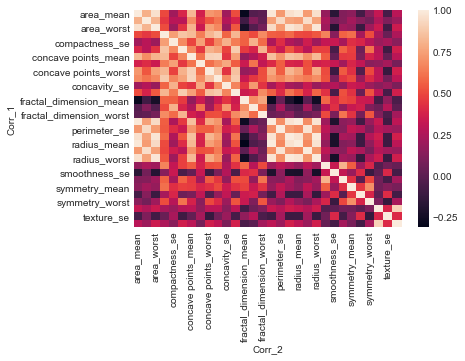

In [7]:
# Plotting a heatmap to visualise correlations
sns.heatmap(corr_pivot_data)

Lighter the shade, more the correlation

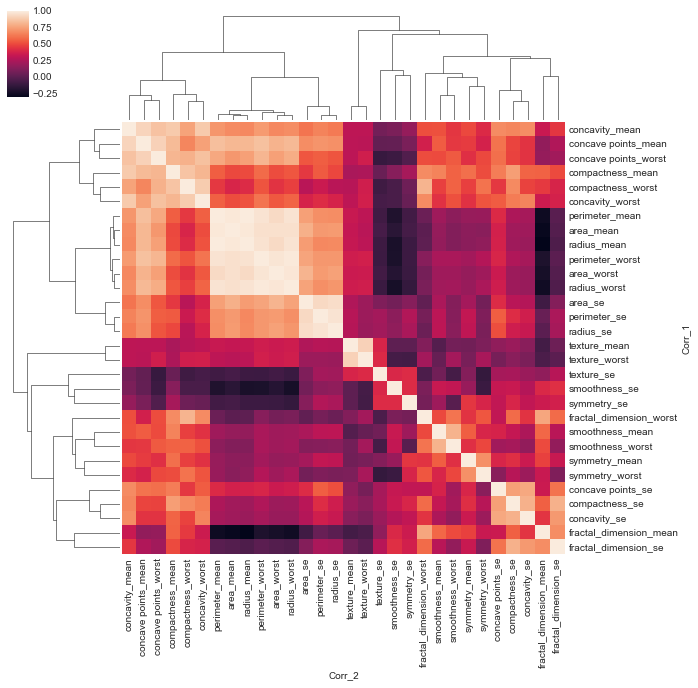

In [8]:
# For more in-depth visualisation, a hierarchically-clustered heatmap
sns.clustermap(corr_pivot_data)


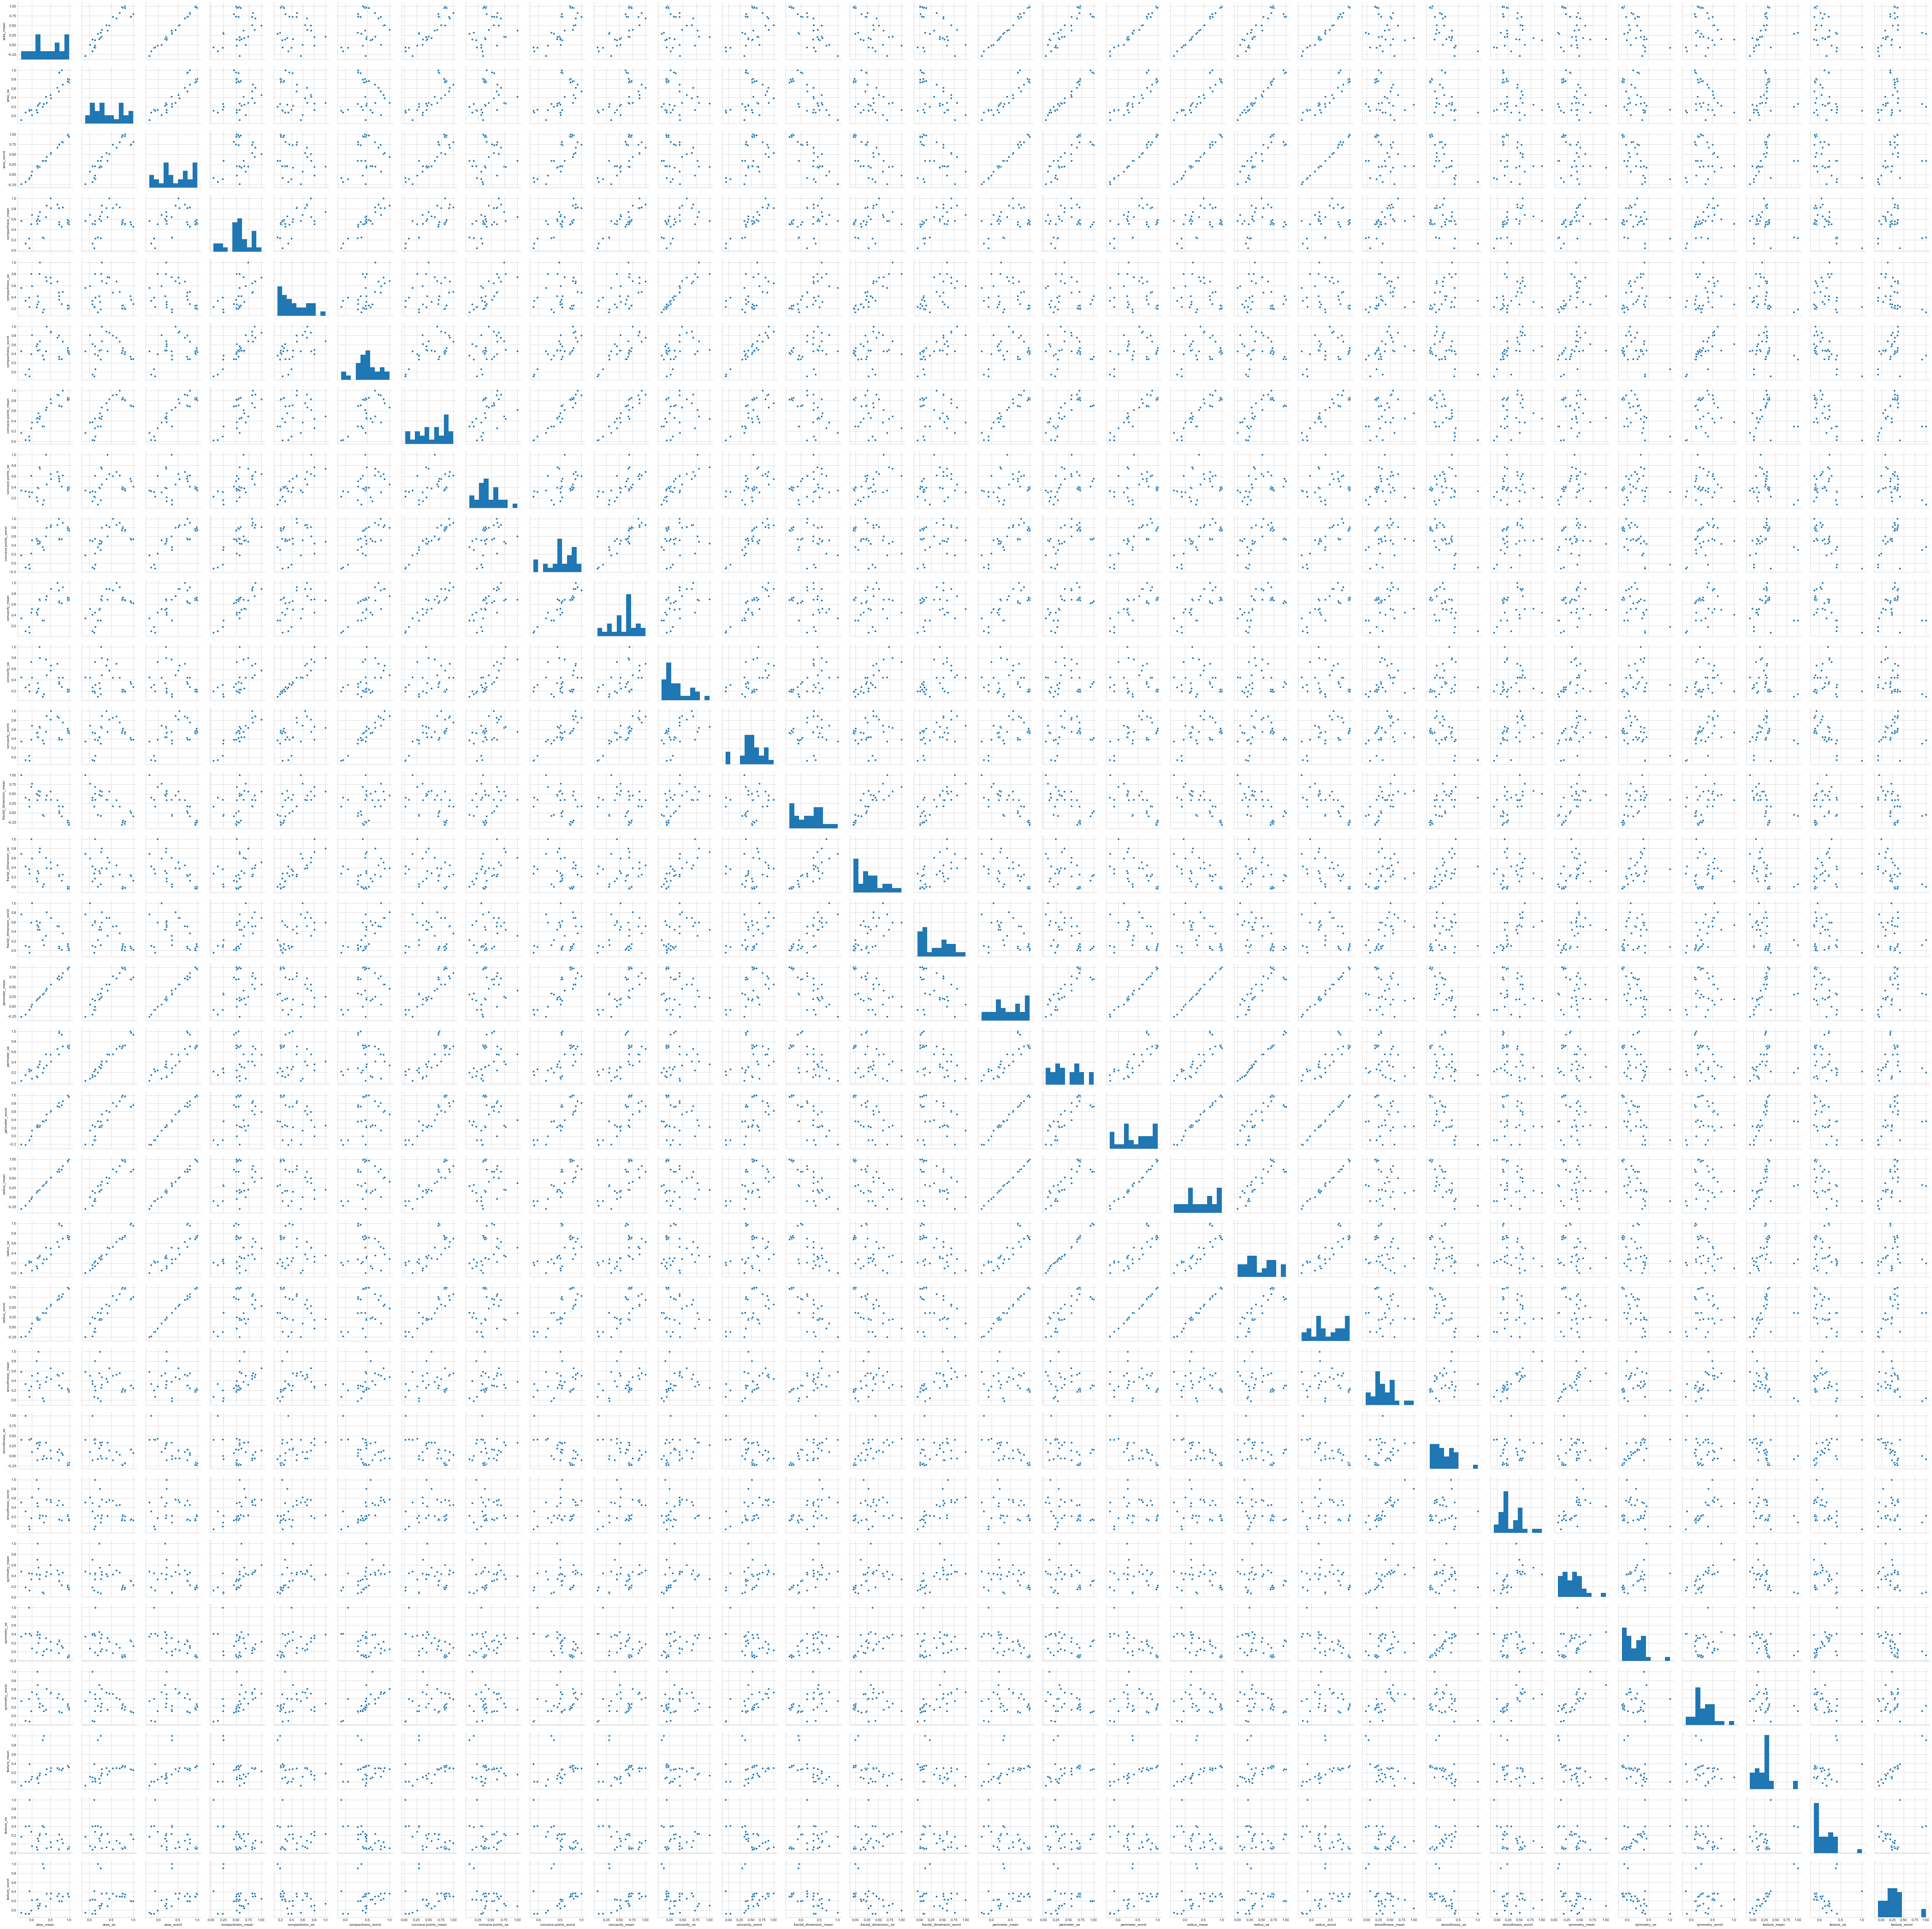

In [9]:
# Now, we plot pairwise relations in a dataset
sns.pairplot(corr_pivot_data)

Double click on visualisation to analysis it properly. The closer the data points come when plotted to making a straight line, the higher the correlation between the two variables, or the stronger the relationship.

If the data points make a straight line going from the origin out to high x- and y-values, then the variables are said to have a positive correlation. If the line goes from a high-value on the y-axis down to a high-value on the x-axis, the variables have a negative correlation.

In [10]:
corr_data[corr_data['Correlation'] >= 0.85][corr_data['Correlation'] < 0.98]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Corr_1,Corr_2,Correlation
20,radius_mean,radius_worst,0.969539
22,radius_mean,perimeter_worst,0.965137
23,radius_mean,area_worst,0.941082
51,texture_mean,texture_worst,0.912045
67,perimeter_mean,concave points_mean,0.850977
80,perimeter_mean,radius_worst,0.969476
82,perimeter_mean,perimeter_worst,0.970387
83,perimeter_mean,area_worst,0.941550
110,area_mean,radius_worst,0.962746
112,area_mean,perimeter_worst,0.959120


These are the columns we can use for our regression analysis beacuse the correlation coefficient is high enough.

From the above dataframe, we will choose radius_mean and area_worst with a correlation coefficient of around 0.94 to implement regression algorithms.(We can choose any of them but this is just a personal choice)

# What is scikit-learn?
Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

In [11]:
# X is compactness mean and y is concavity mean. We will predict conavity mean using compactness mean
X = data['radius_mean'].values
y = data['area_worst'].values

In [12]:
# Splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

In [13]:
# Reshaping the training and test sets to avoid ValueError
X_train = X_train.reshape((512,1))
y_train = y_train.reshape((512,1))
X_test = X_test.reshape((57,1))
y_test = y_test.reshape((57,1))

# Linear Models
The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the input variables. In mathematical notion, if y is the predicted value.
<img src="http://scikit-learn.org/stable/_images/math/334dd847bce79ed52a760f02b3efd8faefdb6e8b.png">
Across the module, we designate the vector  w = (w<sub>1</sub>,..., w<sub>p</sub>)  as coef_ and w<sub>0</sub> as intercept_.

# 1. Ordinary Least Squares
LinearRegression fits a linear model with coefficients w = (w_1, ..., w_p) to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. Mathematically it solves a problem of the form:<img src="http://scikit-learn.org/stable/_images/math/e8e92a5482d9327d939e7a17946a8a1b98006018.png">

LinearRegression will take in its fit method arrays X, y. However, coefficient estimates for Ordinary Least Squares rely on the independence of the model terms. When terms are correlated and the columns of the design matrix X have an approximate linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed response, producing a large variance. This situation of multicollinearity can arise, for example, when data are collected without an experimental design.


In [14]:
# Fitting training set to the regressor
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

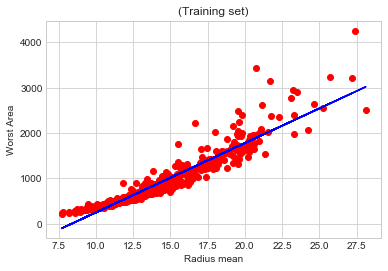

In [15]:
# Visualising the Training set results
plt.scatter(X_train, y_train,color='red')
plt.plot(X_train, linear_regressor.predict(X_train), color='blue')
plt.title('(Training set)')
plt.xlabel('Radius mean')
plt.ylabel('Worst Area')
plt.show()

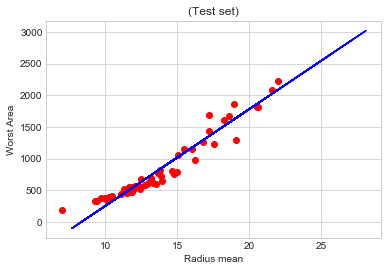

In [16]:
# Visualising the Test set results
plt.scatter(X_test, y_test,color='red')
plt.plot(X_train, linear_regressor.predict(X_train), color='blue')
plt.title('(Test set)')
plt.xlabel('Radius mean')
plt.ylabel('Worst Area')
plt.show()

In [17]:
# Checking score to find accuracy
print("Training set score: {:.2f}".format(linear_regressor.score(X_train,y_train)))
print("Test set score: {:.2f}".format(linear_regressor.score(X_test,y_test)))

Training set score: 0.88
Test set score: 0.92


The accuracy to should be around 0.95(95%) for the model to be useful so this model is good but not ideal for our dataset.

# Ridge Regression
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,
<img src="http://scikit-learn.org/stable/_images/math/48dbdad39c89539c714a825c0c0d5524eb526851.png">
Here, α ≥ 0 is a complexity parameter that controls the amount of shrinkage: the larger the value of \alpha, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

In [18]:
# Fitting training set to the regressor
from sklearn.linear_model import Ridge
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)

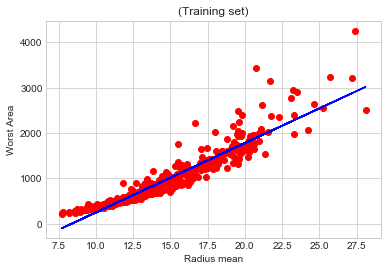

In [19]:
# Visualising the Training set results
plt.scatter(X_train, y_train,color='red')
plt.plot(X_train, ridge001.predict(X_train), color='blue',label='0.01')
plt.title('(Training set)')
plt.xlabel('Radius mean')
plt.ylabel('Worst Area')
plt.show()

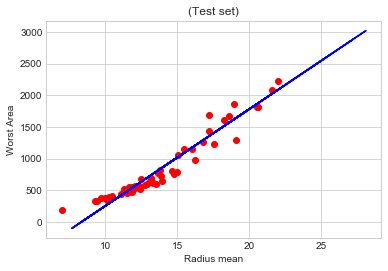

In [20]:
# Visualising the Test set results
plt.scatter(X_test, y_test,color='red')
plt.plot(X_train, ridge001.predict(X_train), color='blue',label='0.01')
plt.title('(Test set)')
plt.xlabel('Radius mean')
plt.ylabel('Worst Area')
plt.show()

In [21]:
# Checking score to find accuracy
print("Alpha = 0.01")
print("Training set score: {:.2f}".format(ridge001.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge001.score(X_test,y_test)))
print("\n")

Alpha = 0.01
Training set score: 0.88
Test set score: 0.92




You can try changing alpha values in ridge to put constraints i.e., Alpha = 0.01,1,10 etc.

# 3. Lasso Regression
The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. For this reason, the Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero weights.

In [22]:
from sklearn.linear_model import Lasso
lasso1 = Ridge(alpha=1).fit(X_train, y_train)

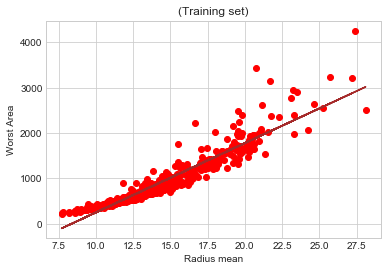

In [23]:
# Visualising the Training set results
plt.scatter(X_train, y_train,color='red')
plt.plot(X_train, lasso1.predict(X_train), color='brown',label='1')
plt.title('(Training set)')
plt.xlabel('Radius mean')
plt.ylabel('Worst Area')
plt.show()

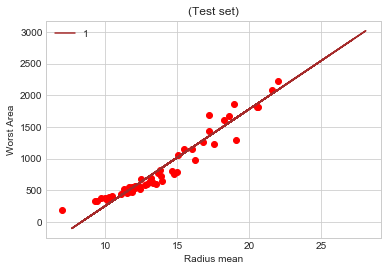

In [24]:
# Visualising the Test set results
plt.scatter(X_test, y_test,color='red')
plt.plot(X_train, lasso1.predict(X_train), color='brown',label='1')
plt.title('(Test set)')
plt.xlabel('Radius mean')
plt.ylabel('Worst Area')
plt.legend()
plt.show()

In [25]:
# Checking score to find accuracy
print("Alpha = 1")
print("Training set score: {:.2f}".format(lasso1.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso1.score(X_test,y_test)))
print("\n")

Alpha = 1
Training set score: 0.88
Test set score: 0.92




Maybe because radius_mean and area_worst are moer than 96% correlated with each other, we get same scores as Linear and Ridge regression. Again, you can try changing alpha values in lasso too to put constraints i.e., Alpha = 0.01,1,10 etc.

# Nearest Neighbors
sklearn.neighbors provides functionality for unsupervised and supervised neighbors-based learning methods. Unsupervised nearest neighbors is the foundation of many other learning methods, notably manifold learning and spectral clustering.

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree.).

In [26]:
# Fitting training set to the regressor
from sklearn.neighbors import KNeighborsRegressor
knn1 = KNeighborsRegressor(n_neighbors=1).fit(X_train,y_train)
knn3 = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
knn5 = KNeighborsRegressor(n_neighbors=5).fit(X_train,y_train)

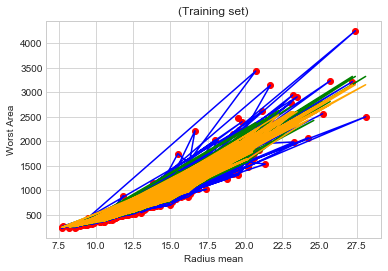

In [27]:
# Visualising the Training set results
plt.scatter(X_train, y_train,color='red')
plt.plot(X_train, knn1.predict(X_train), color='blue',label='1 neighbor')
plt.plot(X_train, knn3.predict(X_train), color='green',label='3 neighbors')
plt.plot(X_train, knn5.predict(X_train), color='orange',label='5 neighbors')
plt.title('(Training set)')
plt.xlabel('Radius mean')
plt.ylabel('Worst Area')
plt.show()

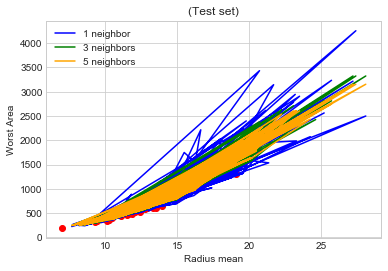

In [28]:
# Visualising the Test set results
plt.scatter(X_test, y_test,color='red')
plt.plot(X_train, knn1.predict(X_train), color='blue',label='1 neighbor')
plt.plot(X_train, knn3.predict(X_train), color='green',label='3 neighbors')
plt.plot(X_train, knn5.predict(X_train), color='orange',label='5 neighbors')
plt.title('(Test set)')
plt.xlabel('Radius mean')
plt.ylabel('Worst Area')
plt.legend()
plt.show()

In [29]:
# Checking score to find accuracy
print("1 neighbor")
print("Training set score: {:.2f}".format(knn1.score(X_train,y_train)))
print("Test set score: {:.2f}".format(knn1.score(X_test,y_test)))
print("\n")
print("3 neighbors")
print("Training set score: {:.2f}".format(knn3.score(X_train,y_train)))
print("Test set score: {:.2f}".format(knn3.score(X_test,y_test)))
print("\n")
print("5 neighbors")
print("Training set score: {:.2f}".format(knn5.score(X_train,y_train)))
print("Test set score: {:.2f}".format(knn5.score(X_test,y_test)))
print("\n")

1 neighbor
Training set score: 0.99
Test set score: 0.93


3 neighbors
Training set score: 0.94
Test set score: 0.93


5 neighbors
Training set score: 0.92
Test set score: 0.96




Much better results than linear models.

# This might be better than others but still not optimum enough.

In [30]:
# Fitting the Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

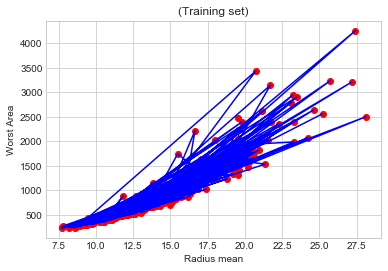

In [31]:
# Visualising the Training set results
plt.scatter(X_train, y_train,color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('(Training set)')
plt.xlabel('Radius mean')
plt.ylabel('Worst Area')
plt.show()

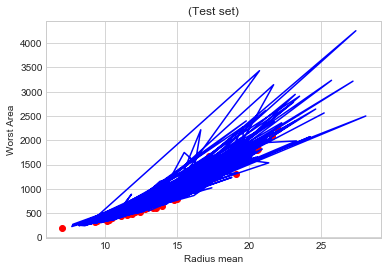

In [32]:
# Visualising the Test set results
plt.scatter(X_test, y_test,color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('(Test set)')
plt.xlabel('Radius mean')
plt.ylabel('Worst Area')
plt.show()

In [33]:
# Checking score to find accuracy
print("Training set score: {:.2f}".format(regressor.score(X_train,y_train)))
print("Test set score: {:.2f}".format(regressor.score(X_test,y_test)))

Training set score: 0.99
Test set score: 0.93


# KNN regressor with 5 neighbors has the best score so that is the most suitable algorithm for this data

If you like this, kindly upvote. Leave suggestions in the comments. Stay tuned. There is more coming soon.